In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
import random

In [2]:
df=pd.read_csv("KNN_DATA.csv")
print(f"Dataset shape: {df.shape}")
df.sample(5)

Dataset shape: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840
76,Jamaica,18.1,31.3,4.81,49.6,8000,9.810,74.7,2.17,4680
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38900


In [3]:
# Check for null/missing values
print("Null values per column:")
print("\nPercentage of null values:")
print((df.isnull().sum() / len(df)) * 100)

Null values per column:

Percentage of null values:
country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64


In [4]:
# Statistical summary (describe)
print("Statistical Summary:")
df.describe()

Statistical Summary:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


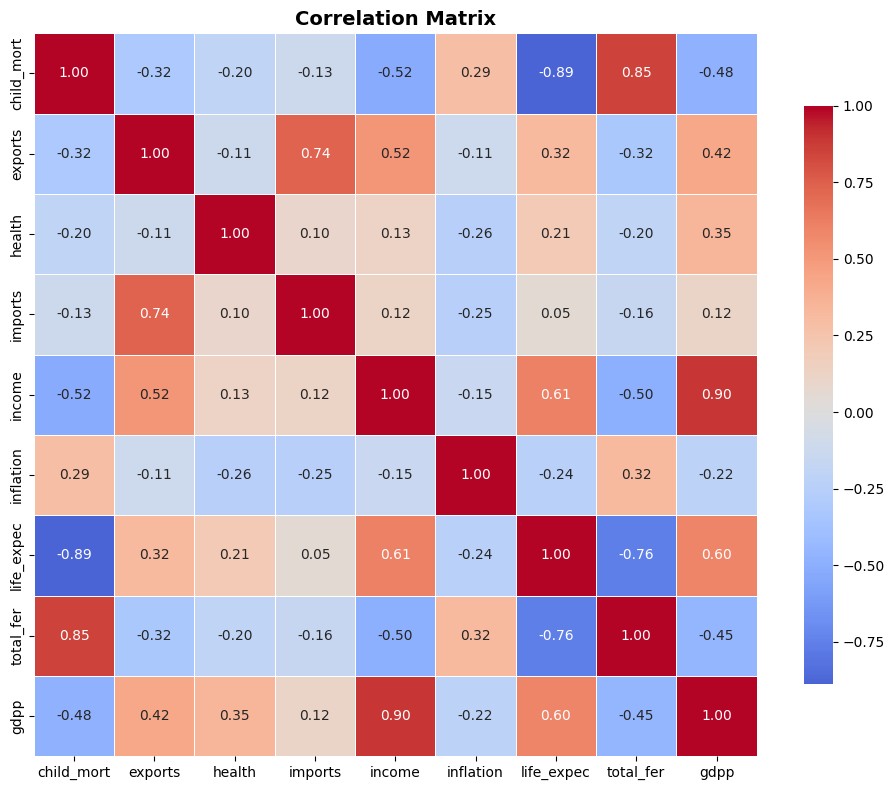

In [5]:
# Correlation Matrix
correlation = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [6]:
df['country'].value_counts()
#the countries are just unique identifiers

country
Afghanistan            1
Albania                1
Algeria                1
Angola                 1
Antigua and Barbuda    1
                      ..
Vanuatu                1
Venezuela              1
Vietnam                1
Yemen                  1
Zambia                 1
Name: count, Length: 167, dtype: int64

In [7]:
X=df.drop('country',axis=1)
y=df['country']

In [8]:
# Shuffle
df = df.sample(frac=1).reset_index(drop=True)

# Split features and labels
X = df.drop('country', axis=1)
y = df['country']

# Train-test split
split = int(0.8 * len(df))

X_train = X.iloc[:split]
X_test = X.iloc[split:]

y_train = y.iloc[:split]
y_test = y.iloc[split:]

# Scale using TRAIN statistics only
mean = X_train.mean()
std = X_train.std()

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

K MEANS CLUSTERING

In [73]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        # <-- convert DataFrame to numpy array so indexing works as expected
        X = np.asarray(X)

        # randomly pick initial centroids
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids.copy()
            self.centroids = self.move_centroids(X, cluster_group)
            if np.allclose(old_centroids, self.centroids):
                break

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        for row in X:
            distances = []
            for centroid in self.centroids:
                dist = np.sqrt(np.dot(row - centroid, row - centroid))
                distances.append(dist)
            min_index = np.argmin(distances)
            cluster_group.append(min_index)
        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        for k in range(self.n_clusters):
            new_centroids.append(X[cluster_group == k].mean(axis=0))
        return np.array(new_centroids)

In [74]:
X_array = np.asarray(X_train_scaled)
inertias = []
K = range(1, 20)

for k in K:
    km = KMeans(n_clusters=k, max_iter=300)
    labels = km.fit_predict(X_array)
    
    # Optimized inertia calculation
    inertia = np.sum((X_array - km.centroids[labels]) ** 2)
    inertias.append(inertia)

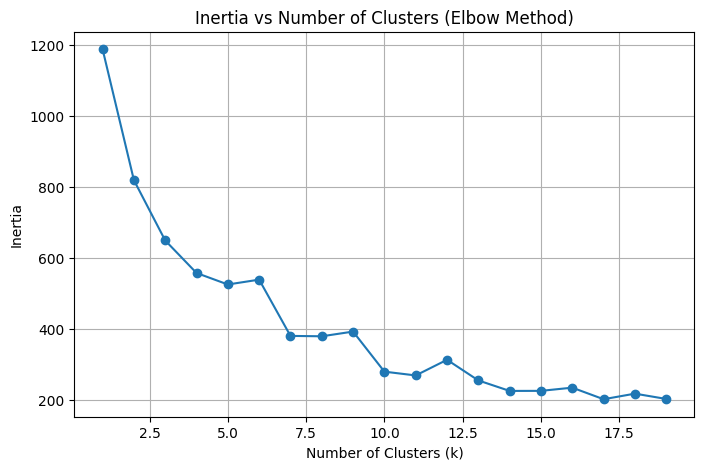

In [75]:
plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters (Elbow Method)')
plt.grid(True)
plt.show()

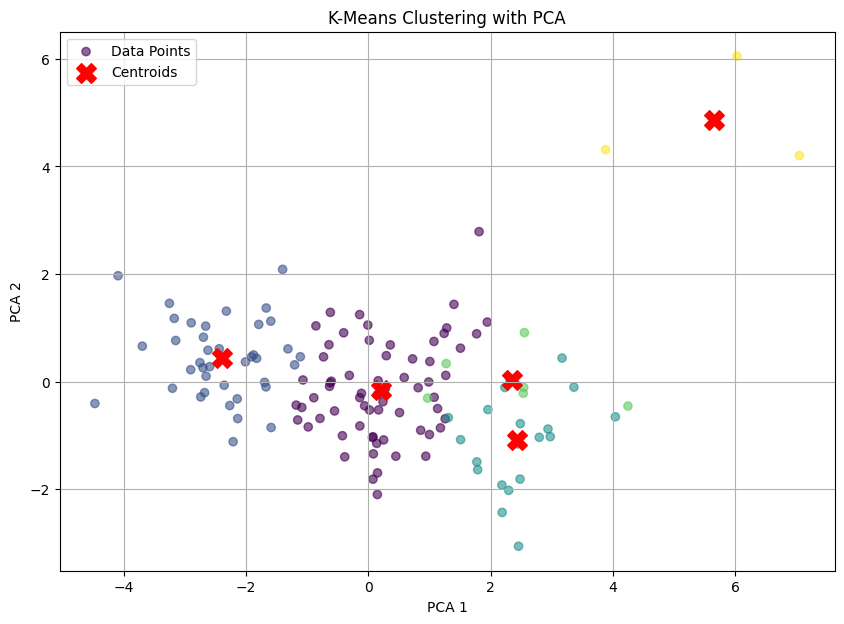

In [76]:
optimal_k = 5
km = KMeans(n_clusters=optimal_k, max_iter=300)
labels = km.fit_predict(X_train_scaled)

# 2. Compress the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

# 3. Compress the centroids to the SAME 2 dimensions
# (We use transform(), not fit_transform(), because the space is already defined by X)
centroids_pca = pca.transform(km.centroids)

# 4. Plot
# 
plt.figure(figsize=(10, 7))

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Data Points')

# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
def pairwise_distances(X):
    n = X.shape[0]
    dist = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            dist[i, j] = np.sqrt(np.sum((X[i] - X[j]) ** 2))

    return dist

def silhouette_score_manual(X, labels):
    X = np.array(X)
    labels = np.array(labels)

    n_samples = X.shape[0]
    unique_labels = np.unique(labels)

    dist_matrix = pairwise_distances(X)

    silhouette_vals = []

    for i in range(n_samples):
        # indices of points in same cluster
        same_cluster_idx = np.where(labels == labels[i])[0]
        same_cluster_idx = same_cluster_idx[same_cluster_idx != i]

        # a(i): mean intra-cluster distance
        if len(same_cluster_idx) > 0:
            a = np.mean(dist_matrix[i, same_cluster_idx])
        else:
            a = 0

        # b(i): min mean distance to other clusters
        b = np.inf
        for lbl in unique_labels:
            if lbl != labels[i]:
                other_cluster_idx = np.where(labels == lbl)[0]
                if len(other_cluster_idx) > 0:
                    b = min(b, np.mean(dist_matrix[i, other_cluster_idx]))

        s = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_vals.append(s)

    return np.mean(silhouette_vals)

score = silhouette_score_manual(X_train_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.3078690402582137


HIERARCHICAL CLUSTERING


In [78]:
class AgglomerativeClusteringWard:
    def __init__(self):
        self.clusters = {}
        self.centroids = {}
        self.cluster_sizes = {} # Track size of each cluster (needed for Ward's)
        self.history = []
        self.n_samples = 0

    def get_ward_cost(self, id1, id2):
        n1 = self.cluster_sizes[id1]
        n2 = self.cluster_sizes[id2]
        c1 = self.centroids[id1]
        c2 = self.centroids[id2]
        
        # Squared Euclidean Distance between centers
        dist_sq = np.sum((c1 - c2) ** 2)
        
        # Ward's multiplier
        ward_dist = (n1 * n2 / (n1 + n2)) * dist_sq
        return ward_dist

    def fit(self, X):
        self.n_samples = X.shape[0]
        current_id = 0
        
        # 1. Initialize
        for i in range(self.n_samples):
            self.clusters[i] = [i]
            self.centroids[i] = X[i]
            self.cluster_sizes[i] = 1 # Every point starts with size 1
            current_id = max(current_id, i)
        
        active_clusters = list(self.clusters.keys())
        
        # 2. Loop
        while len(active_clusters) > 1:
            min_cost = float('inf')
            closest_pair = (None, None)

            # Find pair with lowest Ward's Cost
            for i in range(len(active_clusters)):
                for j in range(i + 1, len(active_clusters)):
                    id1 = active_clusters[i]
                    id2 = active_clusters[j]
                    
                    # USE WARD'S COST FUNCTION
                    cost = self.get_ward_cost(id1, id2)
                    
                    if cost < min_cost:
                        min_cost = cost
                        closest_pair = (id1, id2)

            # 3. Merge
            id1, id2 = closest_pair
            current_id += 1
            new_id = current_id
            
            # Combine
            new_indices = self.clusters[id1] + self.clusters[id2]
            self.clusters[new_id] = new_indices
            
            # Update Size
            size1 = self.cluster_sizes[id1]
            size2 = self.cluster_sizes[id2]
            new_size = size1 + size2
            self.cluster_sizes[new_id] = new_size
            
            # Update Centroid (Weighted Average)
            c1 = self.centroids[id1]
            c2 = self.centroids[id2]
            # Formula for new centroid from two old centroids:
            # (N1*C1 + N2*C2) / (N1+N2)
            new_centroid = (size1 * c1 + size2 * c2) / new_size
            self.centroids[new_id] = new_centroid
            
            # Log history
            self.history.append({
                'child1': id1, 'child2': id2, 
                'dist': min_cost, 'parent': new_id
            })

            # Cleanup
            active_clusters.remove(id1)
            active_clusters.remove(id2)
            active_clusters.append(new_id)

    def get_labels(self, n_clusters_wanted):
        merges_total = self.n_samples - 1
        merges_to_perform = self.n_samples - n_clusters_wanted
        
        active = list(range(self.n_samples)) 
        
        for i in range(merges_to_perform):
            step = self.history[i]
            active.remove(step['child1'])
            active.remove(step['child2'])
            active.append(step['parent'])
            
        labels = np.zeros(self.n_samples)
        for lbl_id, cluster_id in enumerate(active):
            for idx in self.clusters[cluster_id]:
                labels[idx] = lbl_id
        return labels

In [79]:
# 2. Fit Ward clustering
ward_model = AgglomerativeClusteringWard()
X_train_scaled=X_train_scaled.to_numpy()
ward_model.fit(X_train_scaled)
# 3. Get labels
labels_hierarichal = ward_model.get_labels(n_clusters_wanted=3)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to training data (for visualization only)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

def history_to_linkage(model):
    n = model.n_samples
    Z = []

    for step in model.history:
        c1 = step['child1']
        c2 = step['child2']
        dist = step['dist']
        size = model.cluster_sizes[step['parent']]
        Z.append([c1, c2, dist, size])

    return np.array(Z)
Z = history_to_linkage(ward_model)

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=[f"P{i}" for i in range(ward_model.n_samples)],
    leaf_rotation=90,
    leaf_font_size=10
)

plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Ward Distance")
plt.tight_layout()
plt.show()


# Separate components
PC1 = X_pca[:, 0]
PC2 = X_pca[:, 1]

plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

for i in range(len(X_train)):
    plt.scatter(
        PC1[i],
        PC2[i],
        color=colors[int(labels[i]) % len(colors)],
        s=90,
        edgecolors='black',
        alpha=0.8
    )

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Agglomerative Hierarchical Clustering (Ward Linkage)\nPCA Visualization")
plt.grid(True)
plt.show()

ValueError: Dimensions of Z and labels must be consistent.

<Figure size 1000x600 with 0 Axes>

In [ ]:
def pairwise_distances(X):
    n = X.shape[0]
    dist = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            dist[i, j] = np.sqrt(np.sum((X[i] - X[j]) ** 2))

    return dist

def silhouette_score_manual(X, labels):
    X = np.array(X)
    labels = np.array(labels)

    n_samples = X.shape[0]
    unique_labels = np.unique(labels)

    dist_matrix = pairwise_distances(X)

    silhouette_vals = []

    for i in range(n_samples):
        # indices of points in same cluster
        same_cluster_idx = np.where(labels == labels[i])[0]
        same_cluster_idx = same_cluster_idx[same_cluster_idx != i]

        # a(i): mean intra-cluster distance
        if len(same_cluster_idx) > 0:
            a = np.mean(dist_matrix[i, same_cluster_idx])
        else:
            a = 0

        # b(i): min mean distance to other clusters
        b = np.inf
        for lbl in unique_labels:
            if lbl != labels[i]:
                other_cluster_idx = np.where(labels == lbl)[0]
                if len(other_cluster_idx) > 0:
                    b = min(b, np.mean(dist_matrix[i, other_cluster_idx]))

        s = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_vals.append(s)

    return np.mean(silhouette_vals)

score = silhouette_score_manual(X_train_scaled, labels_hierarichal)
print("Silhouette Score:", score)

Silhouette Score: 0.2894331353691187


KNN CLASSIFICATION


In [81]:
df['child_mort'].value_counts()
df.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_class
77,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1
21,Moldova,17.2,39.2,11.70,78.5,3910,11.10,69.7,1.27,1630,1
14,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2
160,Spain,3.8,25.5,9.54,26.8,32500,0.16,81.9,1.37,30700,0
9,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.80,65.4,3.46,2860,1


In [82]:
def classify_child_mort(x):
    if x <= 8.25:
        return 0   # Low
    elif x <= 62.1:
        return 1   # Medium
    else:
        return 2   # High

df['child_mort_class'] = df['child_mort'].apply(classify_child_mort)
df['child_mort_class'].value_counts()


child_mort_class
1    83
0    42
2    42
Name: count, dtype: int64

In [83]:
X = df.drop(columns=['child_mort', 'child_mort_class', 'country']).to_numpy()
y = df['child_mort_class'].to_numpy()


np.random.seed(42)
indices = np.random.permutation(len(X))

split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train = X[train_idx]
X_test  = X[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
std[std == 0] = 1  # safety

X_train_std = (X_train - mean) / std
X_test_std  = (X_test  - mean) / std

In [96]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def knn_predict(X_train, y_train, X_test, k=20):
    predictions = []

    for x_test in X_test:
        distances = []

        for x_train in X_train:
            distances.append(euclidean_distance(x_test, x_train))

        distances = np.array(distances)
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]

        values, counts = np.unique(k_labels, return_counts=True)
        prediction = values[np.argmax(counts)]

        predictions.append(prediction)

    return np.array(predictions)


In [140]:
def precision_manual(y_true, y_pred, average="macro"):
    cm, classes = confusion_matrix_manual(y_true, y_pred)
    precisions = []

    for i in range(len(classes)):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        precisions.append(precision)

    precisions = np.array(precisions)

    if average == "macro":
        return np.mean(precisions)

    if average == "weighted":
        weights = np.sum(cm, axis=1) / np.sum(cm)
        return np.sum(precisions * weights)

    return precisions


In [141]:
def recall_manual(y_true, y_pred, average="macro"):
    cm, classes = confusion_matrix_manual(y_true, y_pred)
    recalls = []

    for i in range(len(classes)):
        tp = cm[i, i]
        fn = np.sum(cm[i, :]) - tp

        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        recalls.append(recall)

    recalls = np.array(recalls)

    if average == "macro":
        return np.mean(recalls)

    if average == "weighted":
        weights = np.sum(cm, axis=1) / np.sum(cm)
        return np.sum(recalls * weights)

    return recalls


In [142]:
def f1_score_manual(y_true, y_pred, average="macro"):
    precision = precision_manual(y_true, y_pred, average=None)
    recall = recall_manual(y_true, y_pred, average=None)

    f1 = np.where(
        (precision + recall) != 0,
        2 * precision * recall / (precision + recall),
        0
    )

    if average == "macro":
        return np.mean(f1)

    if average == "weighted":
        cm, _ = confusion_matrix_manual(y_true, y_pred)
        weights = np.sum(cm, axis=1) / np.sum(cm)
        return np.sum(f1 * weights)

    return f1


In [143]:
def accuracy_manual(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [145]:
k_values = range(1, 21)
accuracies = []
f1_scores = []

for k in k_values:
    y_pred = knn_predict(X_train_std, y_train, X_test_std, k=k)

    acc = accuracy_manual(y_test, y_pred)
    f1 = f1_score_manual(y_test, y_pred)

    accuracies.append(acc)
    f1_scores.append(f1)

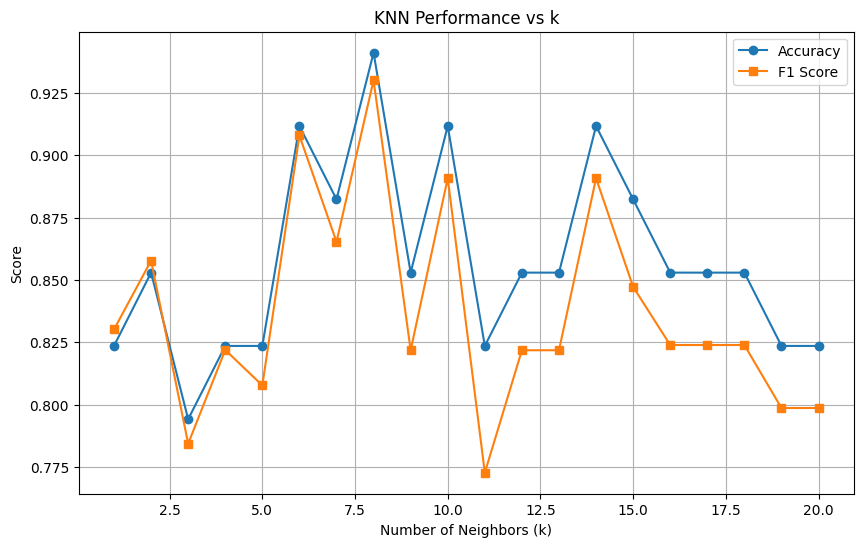

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, f1_scores, marker='s', label='F1 Score')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("KNN Performance vs k")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm)   # no explicit colors
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Write values inside cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, cm[i, j],
                ha="center", va="center",
                fontsize=12
            )

    plt.tight_layout()
    plt.show()


Confusion Matrix:
 [[ 6  2  0]
 [ 0 14  0]
 [ 0  0 12]]
Classes: [0 1 2]
Accuracy: 0.9411764705882353
Precision (macro): 0.9583333333333334
Recall (macro): 0.9166666666666666
F1 Score (macro): 0.9301587301587301


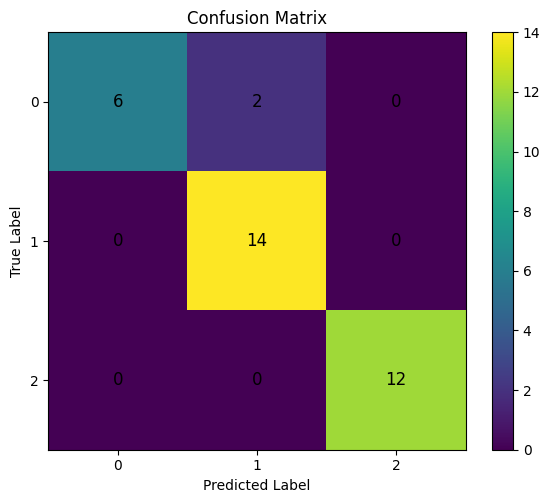

In [152]:
y_pred = knn_predict(X_train_std, y_train, X_test_std, k=8)

cm, classes = confusion_matrix_manual(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classes:", classes)

print("Accuracy:", accuracy_manual(y_test, y_pred))
print("Precision (macro):", precision_manual(y_test, y_pred))
print("Recall (macro):", recall_manual(y_test, y_pred))
print("F1 Score (macro):", f1_score_manual(y_test, y_pred))

plot_confusion_matrix(cm, classes)


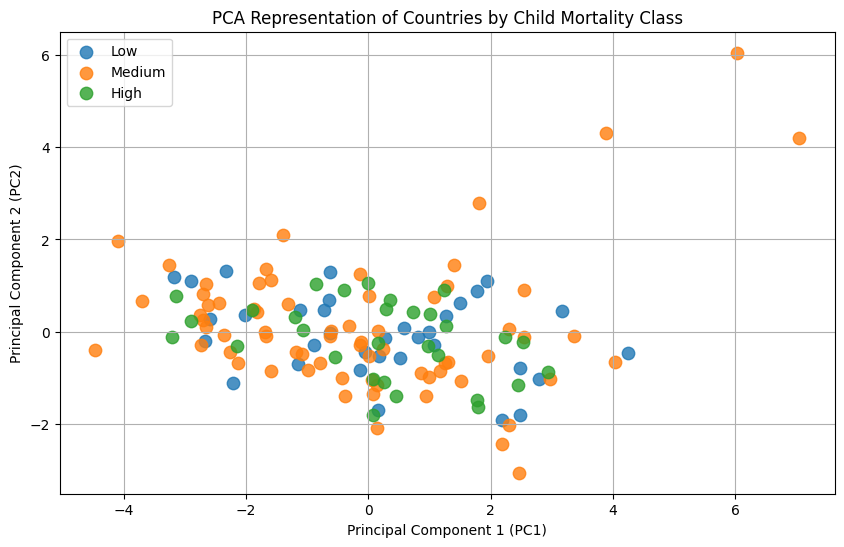

In [154]:
plt.figure(figsize=(10, 6))

colors = ['green', 'orange', 'red']
labels_map = ['Low', 'Medium', 'High']

for cls in np.unique(y_train):
    plt.scatter(
        X_pca[y_train == cls, 0],
        X_pca[y_train == cls, 1],
        label=labels_map[cls],
        alpha=0.8,
        s=80
    )

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Representation of Countries by Child Mortality Class")
plt.legend()
plt.grid(True)
plt.show()